# 1. Importações

## 1.1 Pacotes

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## 1.2 Dados

In [2]:
uri = "https://raw.githubusercontent.com/daniel-usp/LIT/master/Social_Network_Ads.csv"

df = pd.read_csv(uri)

# 2. EDA

In [12]:
df.shape

(400, 4)

In [3]:
df.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [4]:
df.isnull().sum()

Male               0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
for col in ['Male', 'Purchased']:

  print(df[col].value_counts())

0    204
1    196
Name: Male, dtype: int64
0    257
1    143
Name: Purchased, dtype: int64


In [7]:
df.describe()

,Male,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


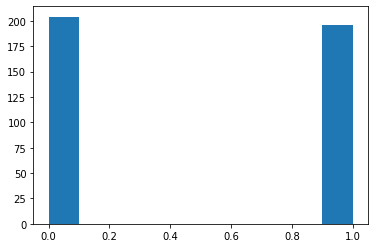

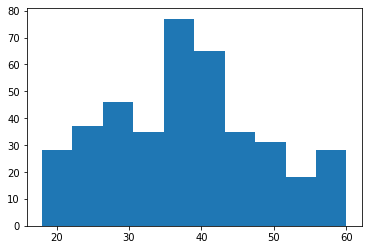

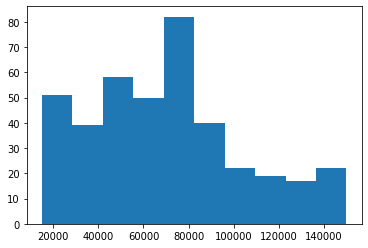

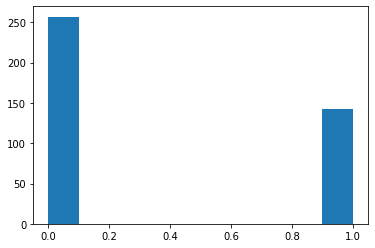

In [10]:
for col in df.columns:
  
  plt.hist(df[col], bins = 10)
  plt.show()

Nota: verifica-se uma distribuição aproximadamente normal dos dados da coluna Age (o que já era esperado) e uma distribuição centralizada na coluna EstimatedSalary, não sendo necessário tratamento de outliers.

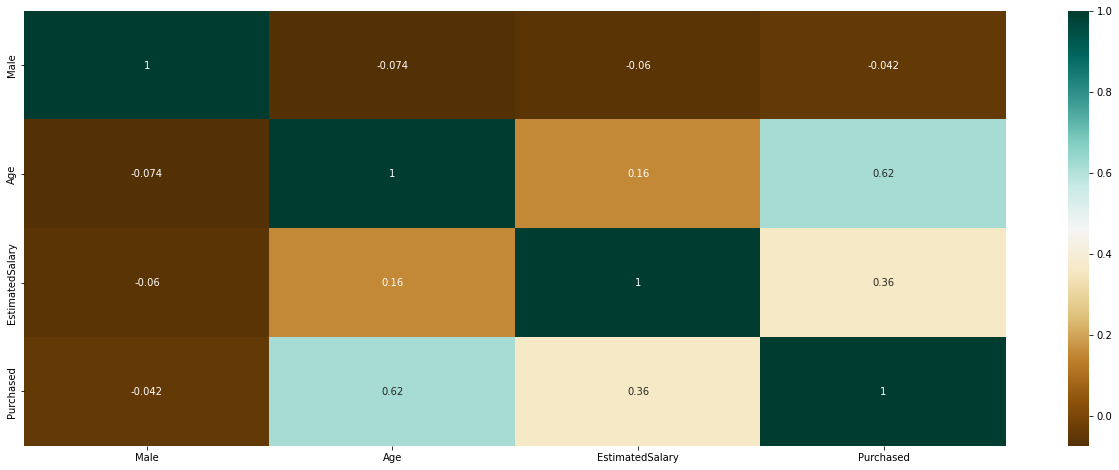

In [6]:
plt.figure(figsize = (22,8))
sns.heatmap(df.corr(), annot=True,cmap='BrBG')
plt.show()

Nota: aqui, verifica-se que a variável Age tem uma alta correlação com o alvo Purchased. Já a variável EstimatedSalary possui uma correlação não tão expresssiva, e a variável Male possui uma correlação quase nula. Apesar de correlação e causalidade não estarem sempre conectadas, esses dados podem trazer informações relevantes para o negócio.

# 3. Modelagem

In [15]:
X = df.drop(columns = ['Purchased'])
y = df['Purchased']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

In [34]:
clf_rf = RandomForestClassifier(n_estimators = 200, max_depth = 7, n_jobs = -1)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, n_jobs=-1)

In [35]:
features = X_train.columns
features_importance = zip(clf_rf.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse = True):
  print(f'{feature}: {importance * 100:.2f}%')


Age: 52.49%
EstimatedSalary: 46.35%
Male: 1.16%


In [36]:
y_pred = clf_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        66
           1       0.87      0.79      0.83        34

    accuracy                           0.89       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.89      0.89      0.89       100

Acurácia: 0.89
